# Machine Learning - Prof: Lívia Almada

* **Equipe:** Henricky de Lima Monteiro (475075) & Danilo Carneiro Teles (470444)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.base import BaseEstimator, RegressorMixin

Este trabalho tem por objetivo analisar quais eventos influênciam no resultado de uma partida rankeado do jogo League of Legends(LOL), jogo do estilo MOBA onde duas equipes de 5 campeões que se enfrentam em 3 rotas e um intermédio delas, chamada *jungle*. Uma partida de Lol tem por objetivo destruir torres para acessar a base e destruir o centro da mesma (Nexus). Durante o desenvolvimento deste trabalho nos deparamos com as seguintes dúvida:

* **Pré-game:** Existem fatores durante a seleção de campeões que influênciam na vítória? (como os campeões selecionados, bans e feitiços de invocador)
* **in-game:** Fatores como quem pegou "first_blood", ou o time que pegou mais *kills* influencia na vitória? (independente dos campeões selecionados) 
* **in-game geral:** Se todos os fatores influênciam na vitória?

Nosso dataset tem uma série de eventos que ocorreram na seleção e na partida e que time ganhou, ou seja, temos um problema de classificação supervisionada. Vamos utilizar 6 modelos para tentar identificar o que melhor se aplica ao problema.


* KNN
* Decision Tree
* Random Forest
* Regrassão Logistica
* Redes Neurais
* Gradient Boosting

## Lendo dados do DataSet

In [20]:
# Leitura dos Dataset
df = pd.read_csv("games.csv")
df = df.fillna(0)
df.shape

(51490, 61)

In [21]:
# Tipos de entradas
labels_desejadas_pre = [
   'winner', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
    't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
    't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't2_champ1id', 't2_champ1_sum1', 
    't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1','t2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 
    't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1','t2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 
    't2_champ5_sum2'
]

labels_desejadas_in = [
    'winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald', 'gameDuration'
]

labels_desejadas_in_geral = [
    'winner','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald',
    't1_champ1id','t1_champ1_sum1','t1_champ1_sum2','t1_champ2id','t1_champ2_sum1','t1_champ2_sum2',
    't1_champ3id','t1_champ3_sum1','t1_champ3_sum2','t1_champ4id','t1_champ4_sum1','t1_champ4_sum2',
    't1_champ5id','t1_champ5_sum1','t1_champ5_sum2','t1_baronKills',
    't1_dragonKills','t1_riftHeraldKills','t2_champ1id','t2_champ1_sum1','t2_champ1_sum2','t2_champ2id',
    't2_champ2_sum1','t2_champ2_sum2','t2_champ3id','t2_champ3_sum1','t2_champ3_sum2','t2_champ4id',
    't2_champ4_sum1','t2_champ4_sum2','t2_champ5id','t2_champ5_sum1','t2_champ5_sum2',
    't2_baronKills','t2_dragonKills','t2_riftHeraldKills','gameDuration'
]

In [22]:
# #remoção das colunas desnecessárias
# df = df.drop(['gameId', 'creationTime', 'seasonId'], axis=1)
# # df = df[labels_desejadas]

df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


## Treinamento de Modelos

Vamos criar uma função para gerar a separação de data e teste

In [23]:
def GenerateTrainTest(data):
    df = data.copy()
    #Pegando a coluna a ser analisada(Quem venceu)
    x = df.drop(['winner'], axis=1).values 
    y = df['winner']
    # Separando Teste(20) e Treino(80)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

## Modelos

### Validação Cruzada

A validação cruzada é uma técnica que consiste em dividir o conjunto de dados em partes menores chamadas folds, onde cada fold é usado como conjunto de teste uma vez, enquanto os demais folds são usados como conjunto de treinamento. O parâmetro "cv" determina quantas vezes essa divisão em folds será repetida e controla a divisão dos dados em folds afetando a quantidade de vezes que o modelo será treinado e testado. Um valor maior de "cv" resulta em uma estimativa mais robusta do desempenho, mas também aumenta o tempo de processamento.

Existem dois métodos:

* **GridSearchCV:** Serve para encontrar os melhores parâmetros.
* **cross_val_score:** Serve para calcular o desempenho médio.

Utilizando-os podemos melhorar os resultados dos modelos.

In [24]:
def get_best_params(model_name, model, X_train, y_train, param_grid, cv = 5, scoring='accuracy' ):
    # Definir os parâmetros a serem ajustados
        # knn exemple: param_grid = {'n_neighbors': [3, 5, 7, 9]}
    # Criar o objeto GridSearchCV
    print(f'\t{model_name} get_best_params')
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

    # Realizar a busca dos melhores parâmetros
    grid_search.fit(X_train, y_train)
    # Obter os melhores parâmetros encontrados
    best_params = grid_search.best_params_
    print("\t\tMelhores parâmetros:", best_params)
    best_accuracy = grid_search.best_score_
    print("\t\tMelhor acurácia:", best_accuracy)
    return best_params

In [25]:

def evaluate_performance(model_name, model,X_train, y_train, scourings, cv = 5):
    print(f'\t{model_name} evaluate_performance')
    res = []
    for score in scourings:
        # Calcular o desempenho médio usando cross_val_score
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=score)

        # Calcular a pontuação média
        mean_score = scores.mean()
        print(f'\t{score}: {mean_score}')
        res.append({score: mean_score})

    return res

In [26]:
def model_train(model_name, model_func,X_train, y_train, param_grid,  scourings = ["accuracy","precision"], criterion = 'gini', cv=5, df = None):
    if(model_name == 'GradientBoosting'):
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
    # Criar o objeto do modelo
    if(model_name in ['DecisionTree', 'RandomForest']):
        model = model_func(criterion = criterion )
    elif model_name == 'NeuralNetwork':
        feature_names = df.drop(['winner'], axis=1).columns.tolist()
        input_dim = len(feature_names)
        model = model_func()
        model.add(Dense(units=64, activation='relu', input_shape=(input_dim,)))
        model.add(Dense(units=64, activation='relu'))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model = model_func()

    # Obter os melhores parâmetros
    best_params = get_best_params(model_name, model, X_train, y_train, param_grid,cv)

    # Configurar o modelo com os melhores parâmetros
    if(model_name in ['DecisionTree', 'RandomForest']):
        model = model_func(**best_params, criterion = criterion )
    elif model_name == 'NeuralNetwork':
        model = model_func()
        model.add(Dense(units=best_params['hidden_layer_sizes'][0], activation=best_params['activation'], input_shape=(input_dim,)))
        model.add(Dense(units=best_params['hidden_layer_sizes'][1], activation=best_params['activation']))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model = model_func(**best_params )
    # Ajustar o modelo aos dados de treinamento
    if model_name == 'NeuralNetwork':
        model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])
    else:
        model.fit(X_train, y_train)
    
    # Avaliar o desempenho do modelo
    performance = evaluate_performance(model_name, model, X_train, y_train, scourings, cv)

    print("Desempenho médio:", performance)
    return model, best_params, performance

### KNN

O algoritmo KNN é um método de aprendizado supervisionado usado para classificação e regressão. Ele determina a classe ou o valor de um ponto de dados com base nas classes ou nos valores dos pontos vizinhos mais próximos. O KNN é simples e intuitivo, onde a previsão é feita com base na maioria das classes dos vizinhos mais próximos. É adequado para problemas em que a estrutura do conjunto de dados não é linear e não paramétrico.

In [27]:
def KNNTrain(df, X_train, y_train , param_grid,  X_test = None, y_test = None):
    return model_train("KNN", KNeighborsClassifier,X_train, y_train, param_grid)


### Árvore de Decisão

A árvore de decisão é um algoritmo de aprendizado supervisionado que toma decisões em forma de uma estrutura em forma de árvore. Cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada folha representa a classe ou o valor de destino. A árvore é construída recursivamente, dividindo o conjunto de dados com base em atributos que melhor separam as classes ou reduzem a impureza. As árvores de decisão são fáceis de interpretar e podem lidar com dados numéricos e categóricos.

In [28]:
def DecisionTreeTrain(df, X_train, y_train, param_grid, withoutCriterion = True,  X_test = None, y_test = None):
    criterions = ["gini", "entropy", "log_loss"]
    performances = []
    for criterion in criterions:
        model, best_params, performance = model_train("DecisionTree", DecisionTreeClassifier,X_train, y_train, param_grid, criterion=criterion)
        performances.append(performance)
        print(f'\tcriterion: {criterion}', performance)
        if(withoutCriterion):
            break
    return model, best_params, performance

def DecisionTreeTrainResult(model, X_train, y_train,best_params = None,performance = None, df = None, X_test = None, y_test = None):
    fig, ax = plt.subplots(figsize=(20, 20))
    tree.plot_tree(model, feature_names=df.columns.tolist(), class_names=["Time 1 venceu", "Time 2 venceu"], filled=True, ax=ax, fontsize=10)
    plt.show()
        


### Random Florest
A floresta aleatória é um conjunto de árvores de decisão. Cada árvore é construída em um subconjunto aleatório de atributos e uma amostra aleatória do conjunto de dados. Durante a previsão, as árvores individuais são consultadas e suas previsões são combinadas por votação (classificação) ou média (regressão). As florestas aleatórias são eficazes para lidar com overfitting, lidar com dados desbalanceados e lidar com uma grande quantidade de recursos.

In [29]:
def RandomForestTrain(df, X_train, y_train, param_grid,  X_test = None, y_test = None):
    model, best_params, performance = model_train("RandomForest", RandomForestClassifier,X_train, y_train, param_grid)
    return model, best_params, performance

def RandomForestTrainResult(model, X_train, y_train,best_params = None,performance = None, df = None, X_test = None, y_test = None):
    importances = model.feature_importances_
    df = df.drop(['winner'], axis=1)
    feature_names = df.columns.tolist()

    if len(feature_names) != len(importances):
        print("Número de colunas do DataFrame não corresponde ao número de importâncias retornadas pelo modelo. ", len(feature_names) - len(importances))
        return None

    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importances[indices], align='center')
    plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
    plt.xlabel('Características')
    plt.ylabel('Importância')
    plt.title('Importância das Características no Random Forest')
    plt.tight_layout()
    plt.show()

### Regreção Logistica

A regressão logística é um modelo estatístico usado para modelar a probabilidade de uma determinada classe ou evento ocorrer com base em variáveis independentes. É amplamente utilizado para problemas de classificação binária, onde a saída é uma das duas classes possíveis. A regressão logística utiliza uma função logística para mapear a soma ponderada das variáveis independentes para uma probabilidade entre 0 e 1. É interpretável e pode ser estendido para problemas de classificação multiclasse.

In [30]:
def LogisticRegressionTrain(df, X_train, y_train, param_grid, X_test = None, y_test = None):
    model, best_params, performance = model_train("LogisticRegressio", LogisticRegression,X_train, y_train, param_grid)
    
    return model, best_params, performance

def LogisticRegressionTrainResult(model, X_train, y_train,best_params = None,performance = None, df = None, X_test = None, y_test = None):
    # Codificar os valores de y_train e y_test para 0 e 1
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    # Calcular as probabilidades das classes previstas
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calcular as probabilidades das classes previstas
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calcular a taxa de falsos positivos e a taxa de verdadeiros positivos
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

    # Calcular a área sob a curva ROC (AUC)
    auc = roc_auc_score(y_test_encoded, y_pred_prob)

    # Plotar a curva ROC
    plt.plot(fpr, tpr, label="Curva ROC (AUC = {:.2f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.legend()
    plt.show()

### Gradient Boosting

O Gradient Boosting é um método de aprendizado de máquina que combina várias árvores de decisão para criar um modelo forte. Ele treina sequencialmente árvores adicionais para corrigir os erros cometidos pelas árvores anteriores. Ao combinar várias árvores fracas, o Gradient Boosting é capaz de construir um modelo poderoso para problemas de regressão e classificação. Ele utiliza o gradiente descendente para ajustar os pesos das árvores e minimizar a função de perda. O Gradient Boosting é conhecido por sua alta precisão e é amplamente utilizado em competições de ciência de dados e problemas do mundo real.

In [31]:
# Definir os parâmetros do modelo
# xgBoostParams = {
#     'objective': 'binary:logistic',  # Para classificação binária
#     'eval_metric': 'logloss',
#     'eta': 0.1,
#     'max_depth': 3,
#     'n_estimators': 100
# }
def XGBoostTrain(df, X_train, y_train, param_grid, X_test = None, y_test = None):
    model, best_params, performance = model_train("GradientBoosting", xgb.XGBClassifier, X_train, y_train, param_grid)
    return model, best_params, performance

def XGBoostTrainResult(model, X_train, y_train,best_params = None,performance = None, df = None, X_test = None, y_test = None):
    xgb.plot_importance(model)
    plt.show()

### Neural Network

As redes neurais são modelos de aprendizado de máquina inspirados pelo funcionamento do cérebro humano. Elas consistem em camadas de neurônios interconectados que realizam operações matemáticas para aprender padrões complexos nos dados. As redes neurais são altamente flexíveis e podem lidar com problemas de classificação, regressão e até mesmo tarefas mais avançadas, como reconhecimento de imagem e processamento de linguagem natural. Elas são treinadas usando algoritmos de otimização, como o gradiente descendente, para ajustar os pesos das conexões entre os neurônios.

In [32]:
class NeuralNetworkEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, hidden_layer_sizes=(64,), activation='relu', epochs=10, batch_size=32):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        feature_dim = X.shape[1]
        self.model = Sequential()
        self.model.add(Dense(units=self.hidden_layer_sizes[0], activation=self.activation, input_shape=(feature_dim,)))
        self.model.add(Dense(units=self.hidden_layer_sizes[1], activation=self.activation))
        self.model.add(Dense(units=1, activation='sigmoid'))
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)

    def predict(self, X):
        return self.model.predict(X)


In [33]:
def NeuralNetworkTrain(df, X_train, y_train, param_grid, X_test=None, y_test=None):
    model = NeuralNetworkEstimator()
    cv = 5
    scourings = ["accuracy","f1"]
    # Definir o objeto GridSearchCV com a métrica de avaliação desejada
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
    
    # Realizar a busca dos melhores parâmetros
    grid_search.fit(X_train, y_train)
    
    # Obter o modelo com os melhores parâmetros
    best_model = grid_search.best_estimator_
    
    # Treinar o modelo com os melhores parâmetros
    best_model.fit(X_train, y_train)

    best_params = grid_search.best_params_
    
    # Avaliar o desempenho do modelo
    performance = evaluate_performance('NeuralNetwork.Sequencial', best_model, X_train, y_train, scourings, cv)
    
    return best_model, best_params ,performance

def NeuralNetworkTrainResult(model, X_train, y_train,best_params = None,performance = None, df = None, X_test = None, y_test = None):
    # Fazer previsões usando os dados de treinamento
    y_train_pred = model.predict(X_train)
    y_train_pred = (y_train_pred > 0.5)

    # Verificar se as colunas têm os mesmos rótulos ou índices
    if list(df.columns) != list(np.arange(len(y_train_pred))):
        # Reindexar o dataframe
        df = df.reindex(columns=np.arange(len(y_train_pred)))

    # Calcular a correlação entre as características e as saídas do modelo
    correlations = df.iloc[:, 1:].apply(lambda x: np.corrcoef(x, y_train_pred.flatten())[0, 1])

    # Ordenar as características por correlação
    sorted_indices = np.argsort(np.abs(correlations))
    sorted_correlations = correlations[sorted_indices]
    sorted_feature_names = df.drop(['winner'], axis=1).columns[sorted_indices]

    # Plotar o gráfico de importância das características
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_correlations)), sorted_correlations, align='center')
    plt.yticks(range(len(sorted_correlations)), sorted_feature_names)
    plt.xlabel('Correlation')
    plt.title('Feature Importance for Neural Network')
    plt.show()



## Aplicação dos modelos

Agora vamos associar os dataset para cada modelo

In [98]:
modelList = {
    'KNN': {'model': KNNTrain, 'result_func':None, 'param_grid': {'n_neighbors': [3, 5, 7, 9]}},
    'DecisionTree': {'model': DecisionTreeTrain, 'result_func':DecisionTreeTrainResult, 'param_grid': {'max_depth': [None, 5, 10, 20]}},
    'RandomForest': {'model': RandomForestTrain, 'result_func':RandomForestTrainResult,'param_grid': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}},
    'LogisticRegression': {'model': LogisticRegressionTrain,'result_func':LogisticRegressionTrainResult, 'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}},
    'GradientBoost': {'model': XGBoostTrain, 'result_func':XGBoostTrainResult, 'param_grid': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300]}},
    # 'NeuralNetwork': {'model': NeuralNetworkTrain, 'result_func':None ,'param_grid': {'hidden_layer_sizes': [(64,), (64, 32), (32, 32)], 'activation': ['relu', 'sigmoid'], 'epochs': [10, 20, 30], 'batch_size': [16, 32, 64]}},
    # 'NeuralNetwork': {'model': NeuralNetworkTrain, 'result_func':NeuralNetworkTrainResult ,'param_grid': {'hidden_layer_sizes': [(64,), (64, 32), (32, 32)], 'activation': ['relu', 'sigmoid'], 'epochs': [10], 'batch_size': [32]}},
}
def ApplyModel(df, df_name):
    X_train, X_test, y_train, y_test = GenerateTrainTest(df)
    model_names = []
    model_s = []
    best_paramss = [] 
    performances =[]
    for name, params in modelList.items():
        model_function = params['model']
        param_grid = params['param_grid']
        result_func = params['result_func']
        print(f'-------------------------\ntrains {name} model ...')
        model, best_params, performance =model_function(df, X_train, y_train , param_grid, X_test = X_test, y_test = y_test)
        model_names.append(name)
        model_s.append(model)
        best_paramss.append(best_params)
        performances.append(performance)

    return {
        'df': df,
        'model_names':model_names, 
        'models':model_s, 
        'best_paramss':best_paramss, 
        'performances':performances, 
        'X_train': X_train, 
        'y_train': y_train,
        'y_test': y_test,
        'X_test': X_test
        }
        

def LogResults(result, df_name):
    X_train = result['X_train']
    y_train = result['y_train']
    y_test = result['y_test']
    X_test = result['X_test']
    df = result['df']
    for i in range(len(result['model_names'])):
        model_name = result['model_names'][i]
        print('Model: ', model_name)
        print('\tbest_paramss: ',result['best_paramss'][i])
        print('\tperformance: ',result['performances'][i])
        model = result['models'][i]
        result_func = modelList[model_name]['result_func']
        if(result_func != None):
            # result_func(model, X_train, y_train)
            result_func(model, X_train, y_train, df = df, X_test = X_test, y_test = y_test)
    print('\n\n-------------------------\n\n')
    finalResult(result)

def finalResult(result):
    model_names = result['model_names']
    performances = result['performances']

    # Obter todas as métricas de desempenho
    metrics = []
    for performance in performances:
        for i in range(len(performance)):
            for metric in performance[i].keys():
                metrics.append(metric)
    metrics = list(set(metrics))

    num_models = len(model_names)
    num_metrics = len(metrics)

    # Configurar as posições das barras no gráfico
    bar_width = 0.35
    index = np.arange(num_models)
    offset = bar_width / num_metrics

    # Plotar gráfico de barras para cada modelo e métrica
    for i in range(num_metrics):
        metric = metrics[i]
        metric_values = [p[i].get(metric, 0) for p in performances]  # Obter o valor da métrica para cada modelo
        bar_positions = index + i * offset

        plt.bar(bar_positions, metric_values, bar_width, label=metric)

    # Configurar rótulos e legendas do gráfico
    plt.xlabel('Model')
    plt.ylabel('Performance')
    plt.title('Performance Metrics for Different Models')
    plt.xticks(index + bar_width / 2, model_names)
    plt.legend()

    # Exibir o gráfico
    plt.show()

In [ ]:
df_pre = df[labels_desejadas_pre]

df_pre_result=ApplyModel(df_pre, 'Pre game')

In [ ]:
df_in = df[labels_desejadas_in]

df_in_result =ApplyModel(df_in, 'In game Geral')

In [ ]:
df_in_g = df[labels_desejadas_in_geral]

df_in_g_result =ApplyModel(df_in_g, 'In game Geral')

## Resultados

### Pre-game 

Model:  KNN
	best_paramss:  {'n_neighbors': 9}
	performance:  [{'accuracy': 0.5057535113950222}, {'precision': 0.5114987293247389}]
Model:  DecisionTree
	best_paramss:  {'max_depth': 5}
	performance:  [{'accuracy': 0.511021706725228}, {'precision': 0.511663834816629}]


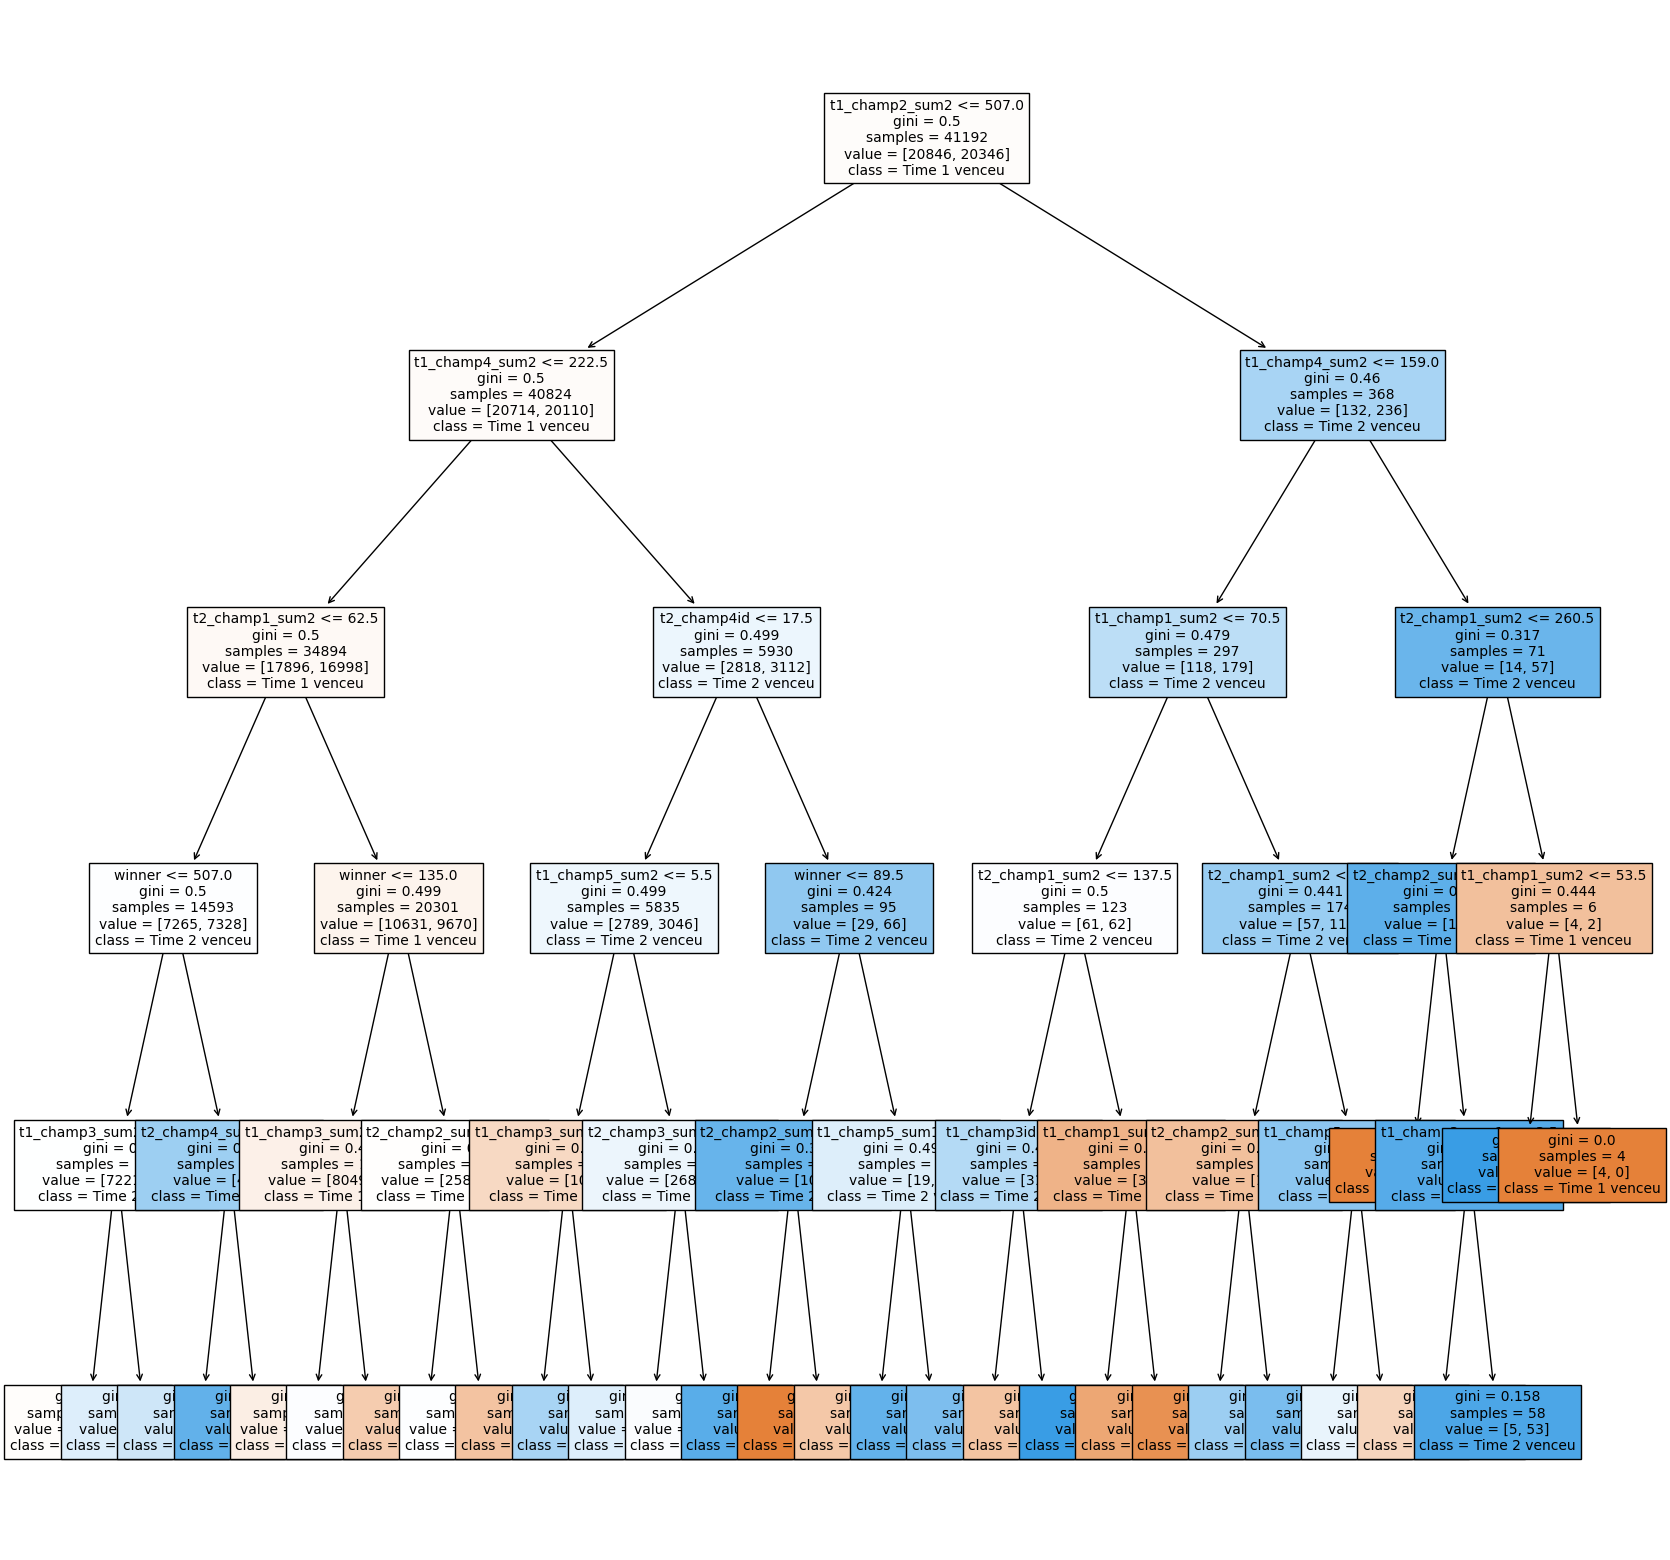

Model:  RandomForest
	best_paramss:  {'max_depth': 10, 'n_estimators': 300}
	performance:  [{'accuracy': 0.5209993351984081}, {'precision': 0.5210269834536899}]


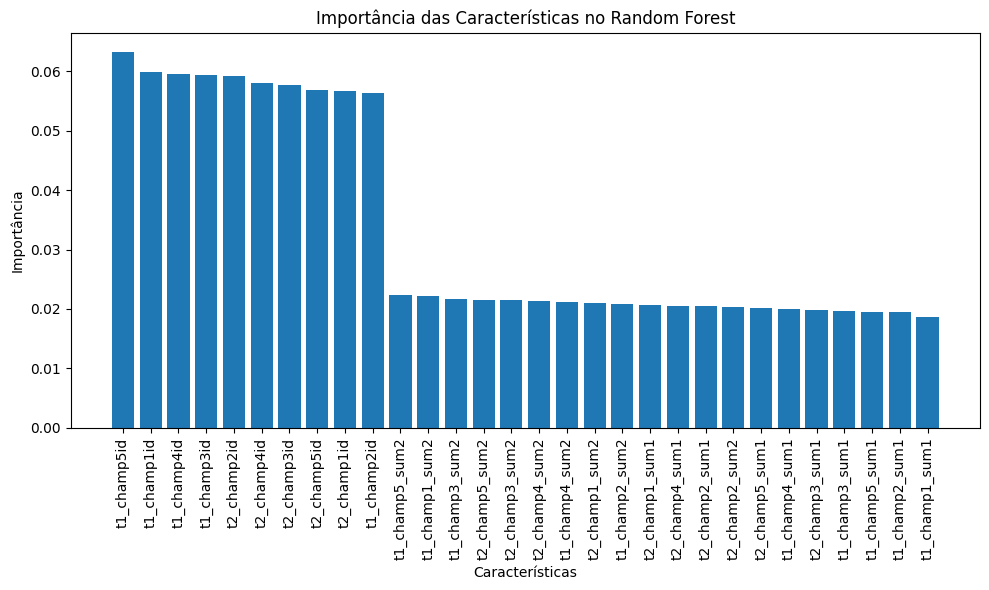

Model:  LogisticRegression
	best_paramss:  {'C': 1, 'penalty': 'l2'}
	performance:  [{'accuracy': 0.5184989639897714}, {'precision': 0.520126406460313}]


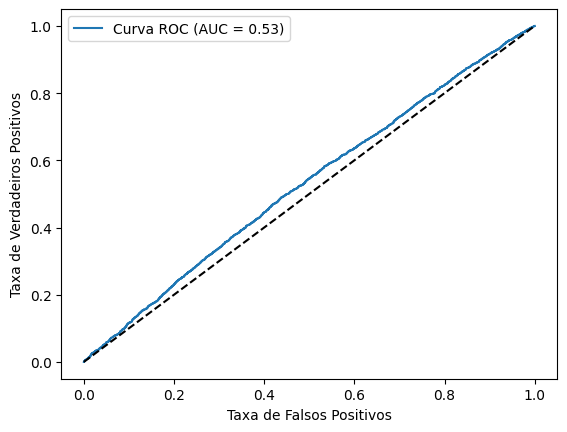

Model:  GradientBoost
	best_paramss:  {'learning_rate': 0.01, 'n_estimators': 300}
	performance:  [{'accuracy': 0.5187900021690548}, {'precision': 0.5163255653909071}]


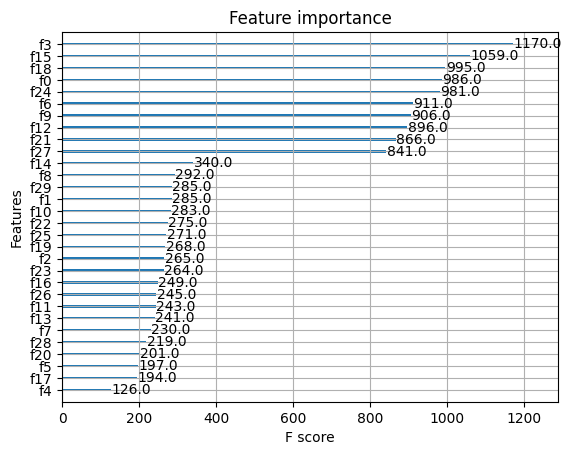



-------------------------




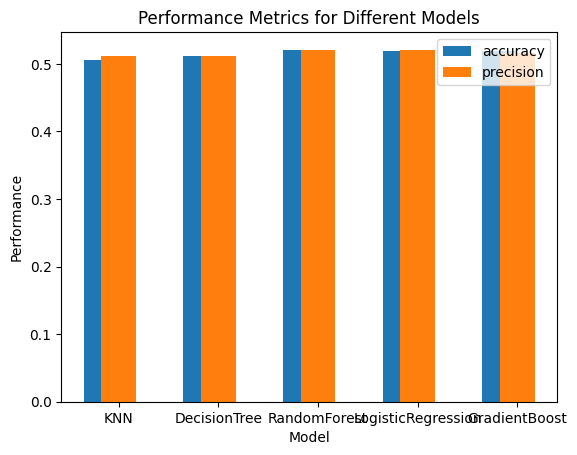

In [103]:
LogResults(df_pre_result, 'Pre game')


### In-game

Model:  KNN
	best_paramss:  {'n_neighbors': 3}
	performance:  [{'accuracy': 0.8259128969947085}, {'precision': 0.8086733014500525}]
Model:  DecisionTree
	best_paramss:  {'max_depth': 5}
	performance:  [{'accuracy': 0.8934015561620029}, {'precision': 0.8909234156628398}]


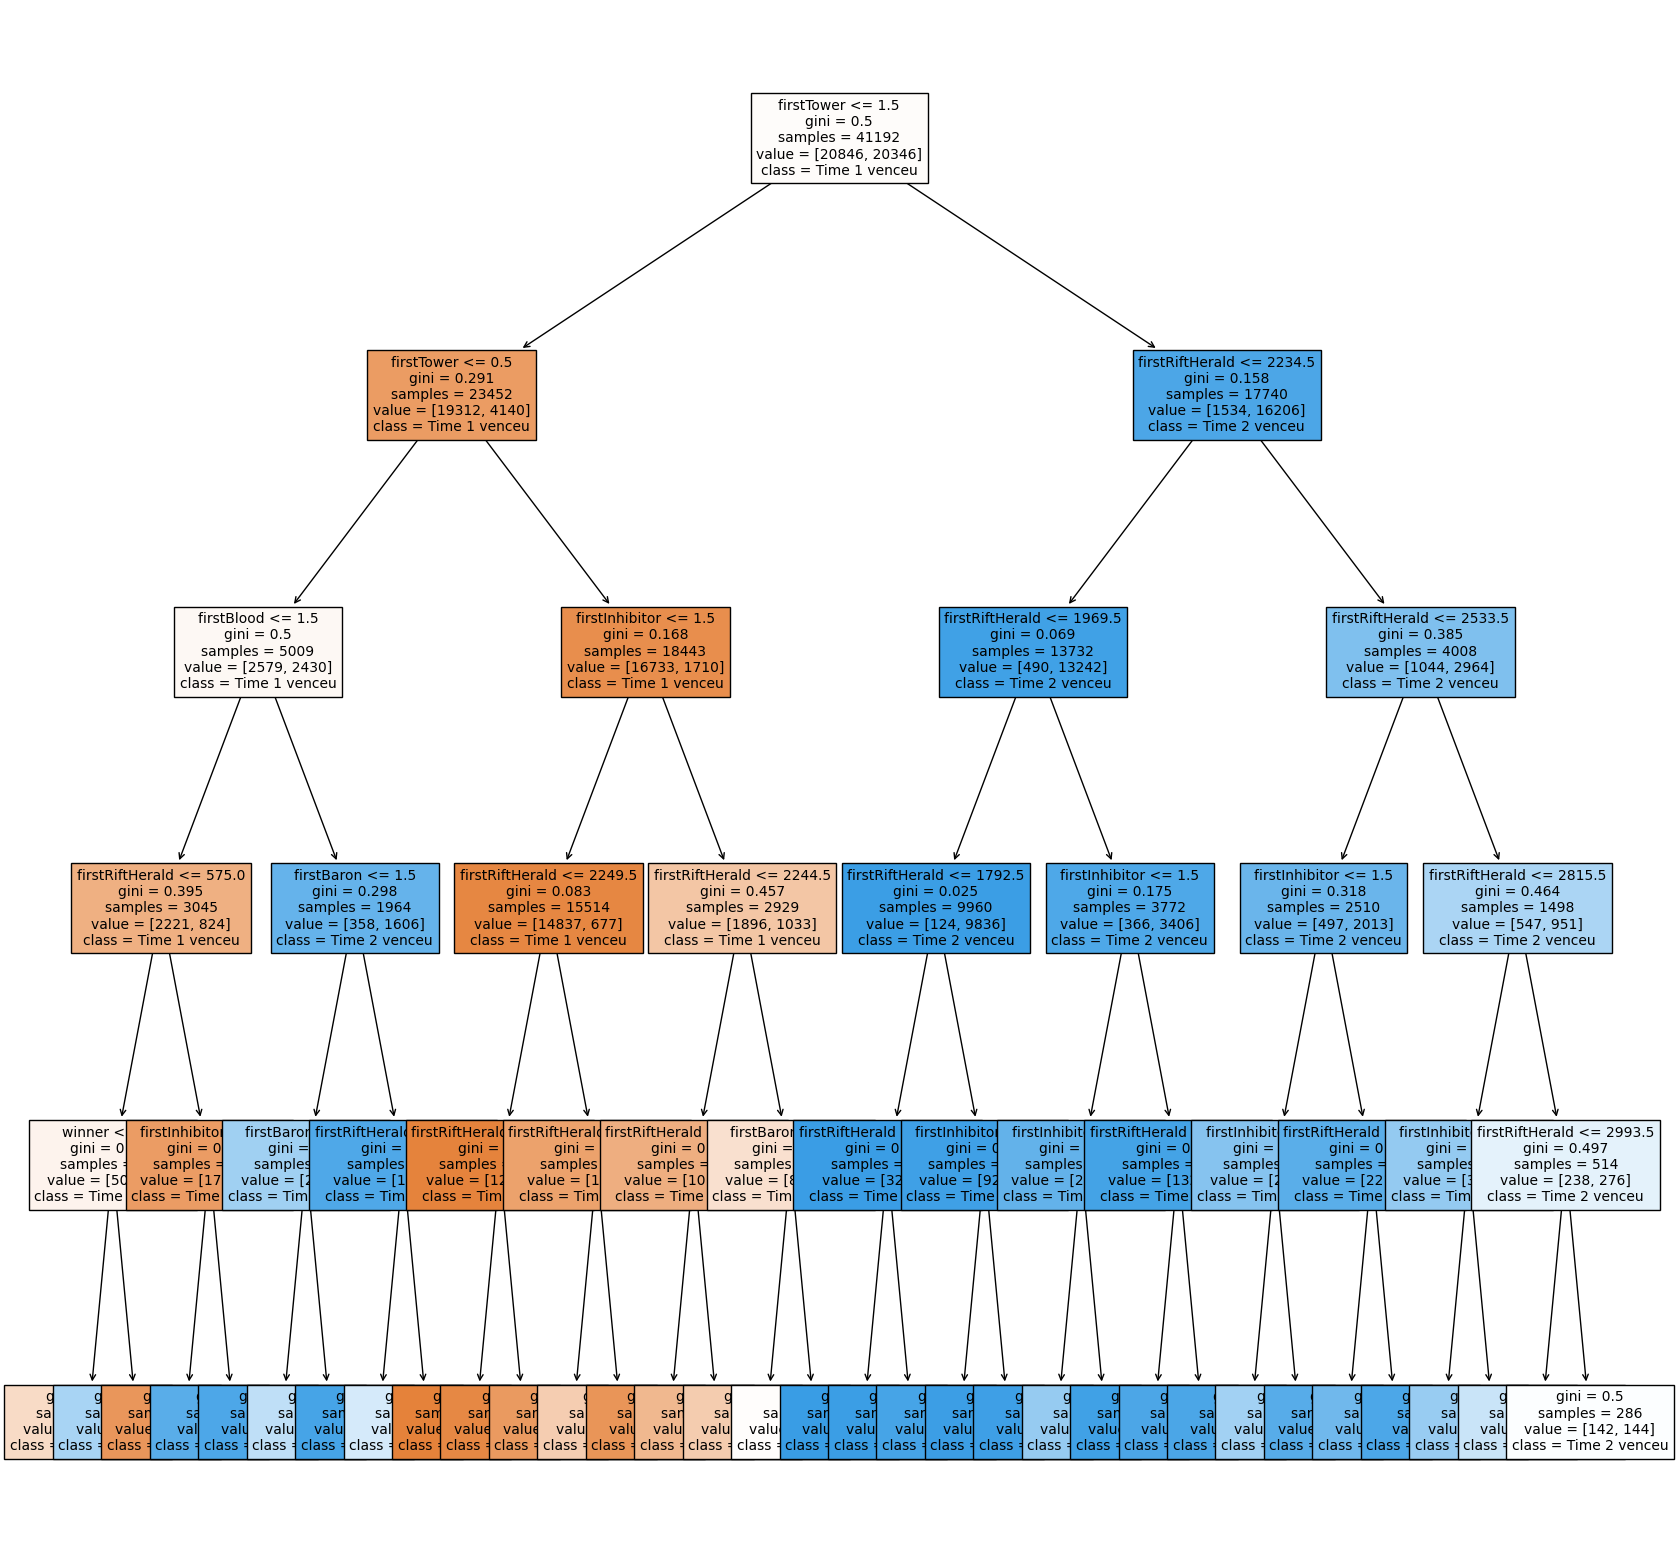

Model:  RandomForest
	best_paramss:  {'max_depth': 10, 'n_estimators': 100}
	performance:  [{'accuracy': 0.8959506272328321}, {'precision': 0.893475841474667}]


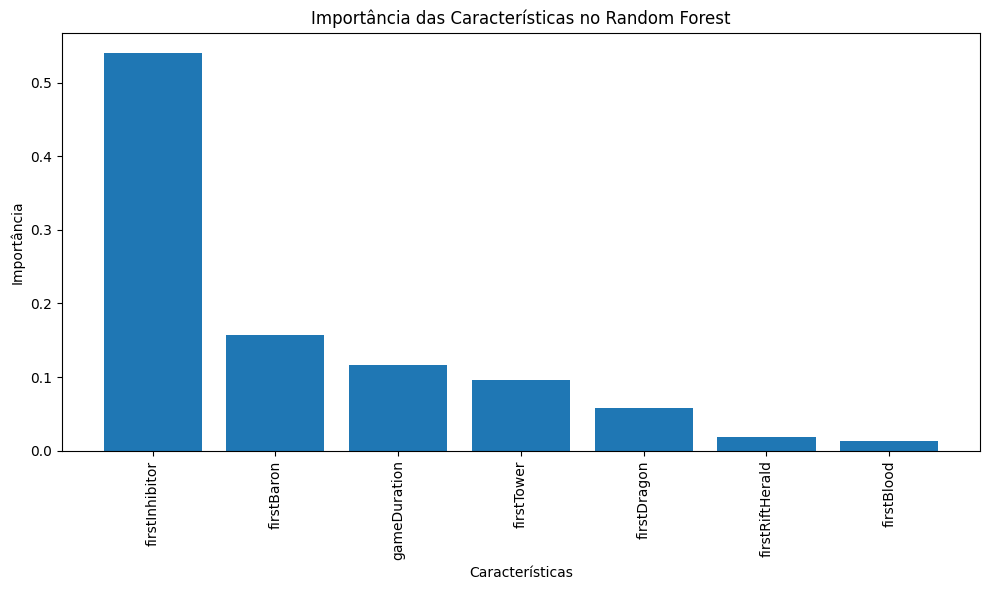

Model:  LogisticRegression
	best_paramss:  {'C': 10, 'penalty': 'l2'}
	performance:  [{'accuracy': 0.8211303772248835}, {'precision': 0.7944225595363354}]


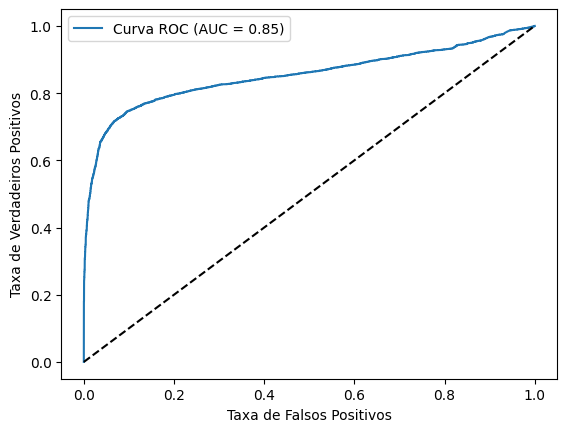

Model:  GradientBoost
	best_paramss:  {'learning_rate': 0.01, 'n_estimators': 300}
	performance:  [{'accuracy': 0.8980384183479935}, {'precision': 0.9022363690667172}]


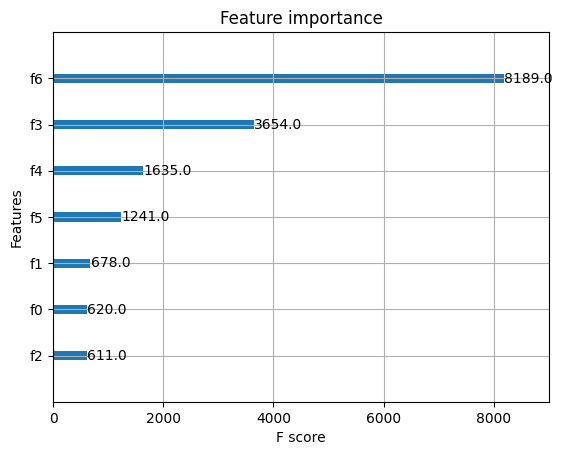



-------------------------




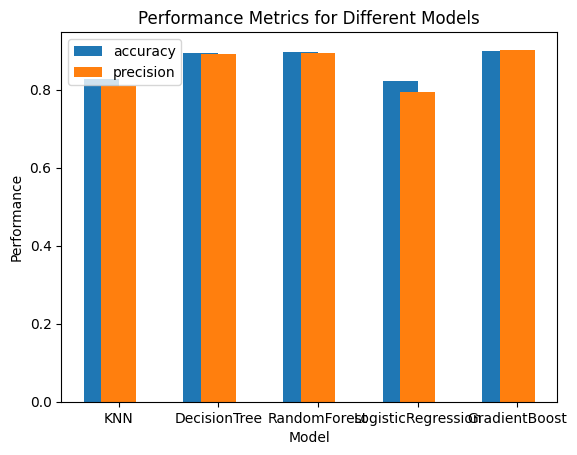

In [100]:
LogResults(df_in_result, 'In game')


### Geral

Model:  KNN
	best_paramss:  {'n_neighbors': 5}
	performance:  [{'accuracy': 0.5078655419405942}, {'precision': 0.5136513624452499}]
Model:  DecisionTree
	best_paramss:  {'max_depth': 5}
	performance:  [{'accuracy': 0.9026509379696004}, {'precision': 0.8824613747659938}]


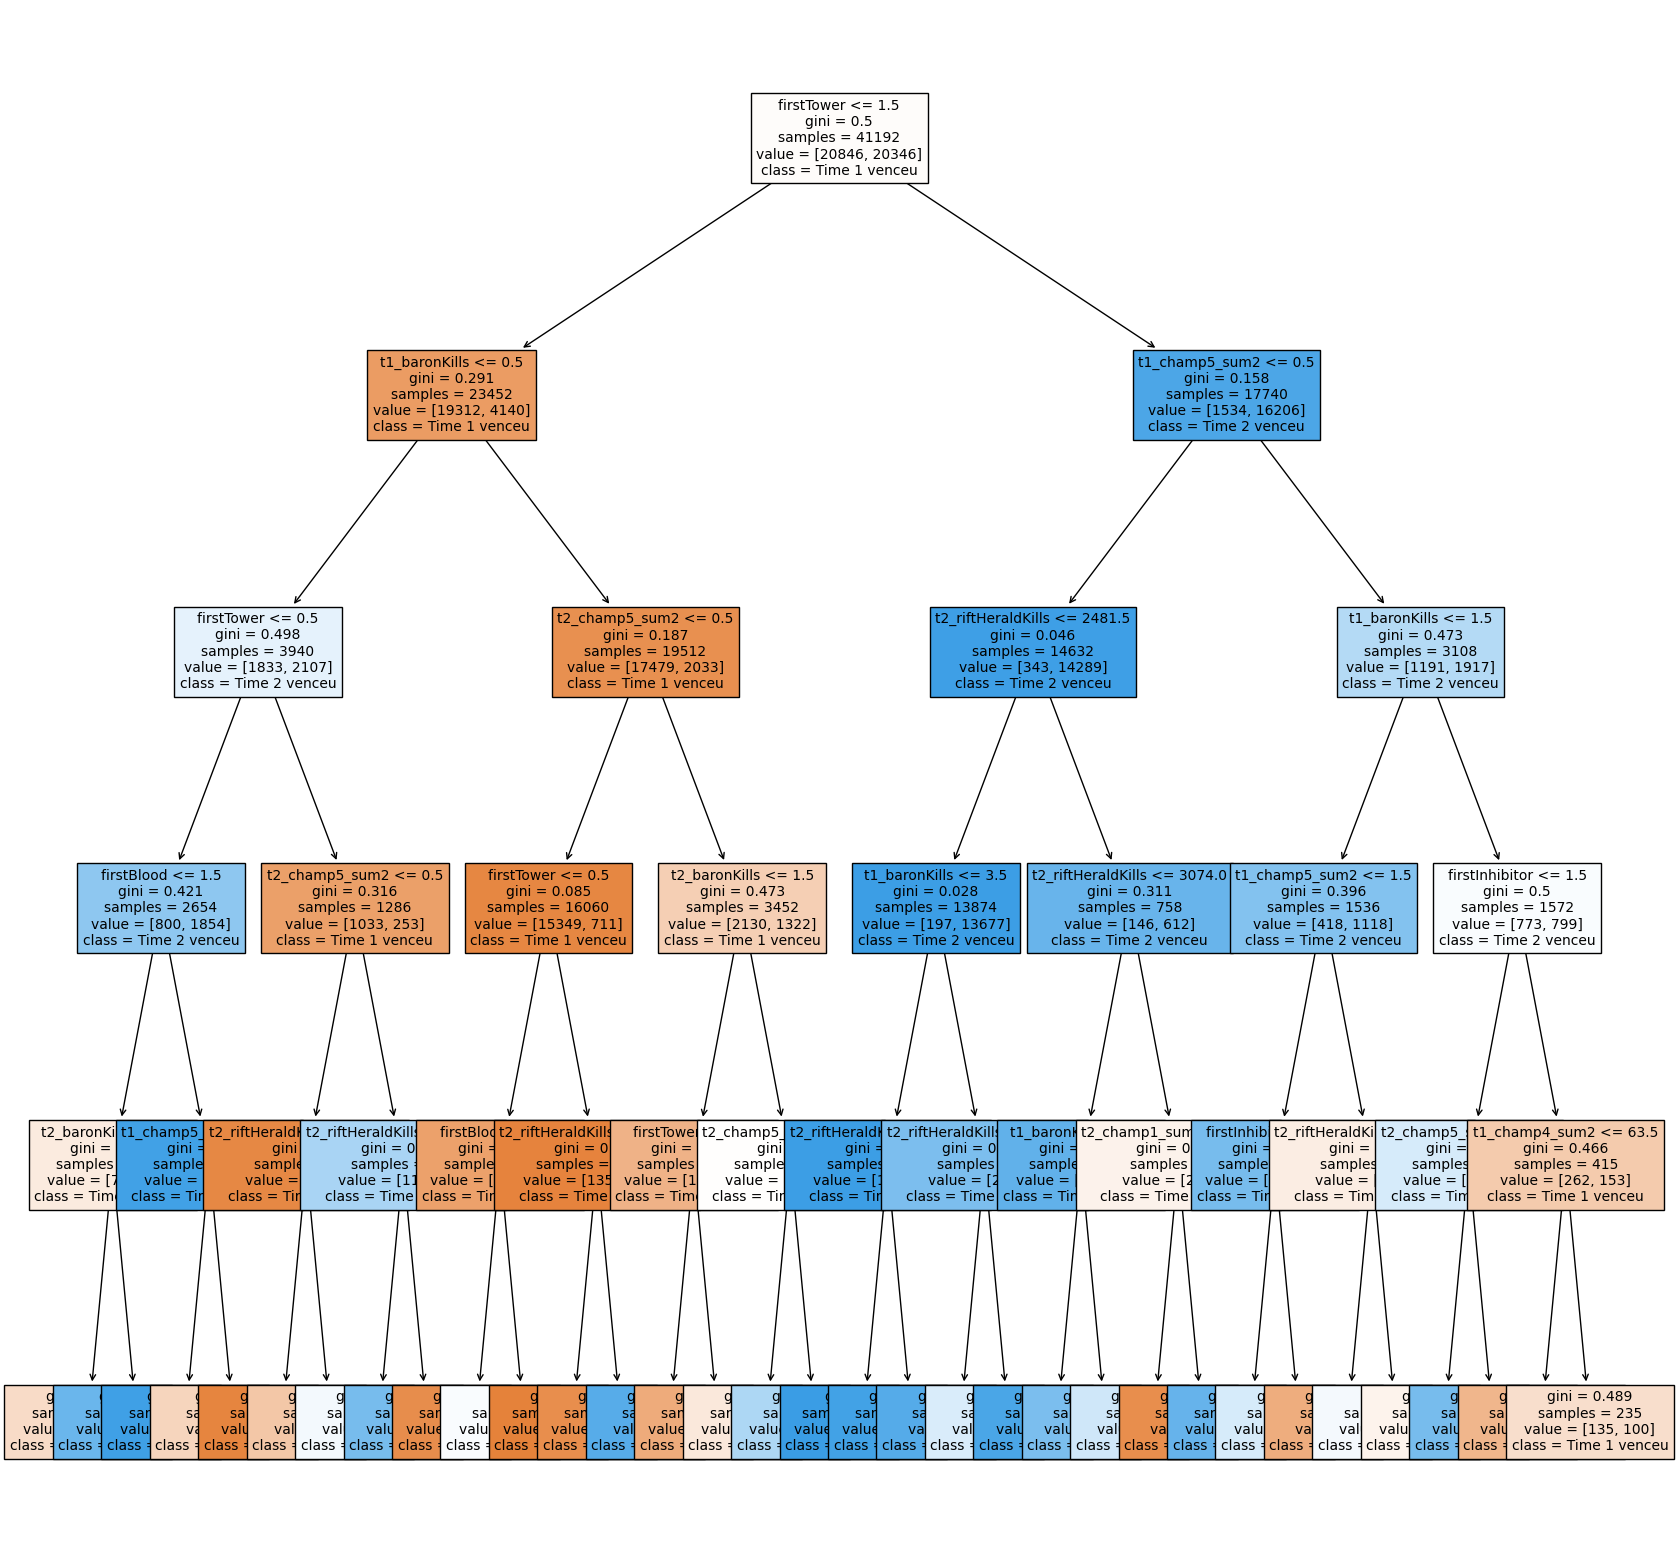

Model:  RandomForest
	best_paramss:  {'max_depth': None, 'n_estimators': 300}
	performance:  [{'accuracy': 0.9121673159539624}, {'precision': 0.9110814852260185}]


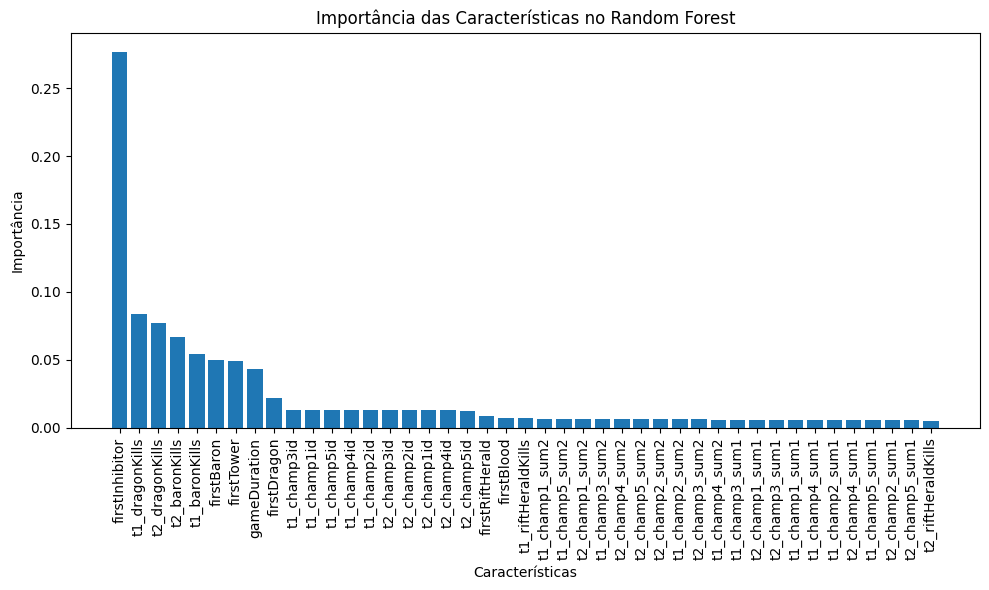

Model:  LogisticRegression
	best_paramss:  {'C': 10, 'penalty': 'l2'}
	performance:  [{'accuracy': 0.8233152733959344}, {'precision': 0.8158836191138148}]


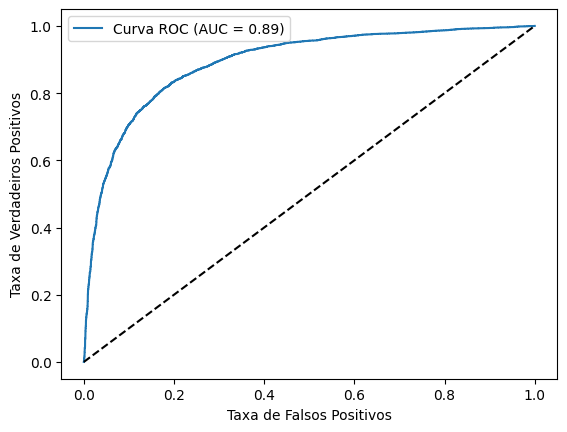

Model:  GradientBoost
	best_paramss:  {'learning_rate': 0.1, 'n_estimators': 100}
	performance:  [{'accuracy': 0.91389096458288}, {'precision': 0.9157634356349431}]


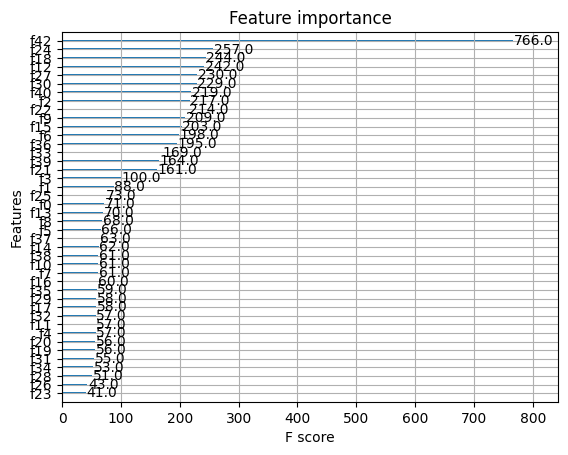



-------------------------




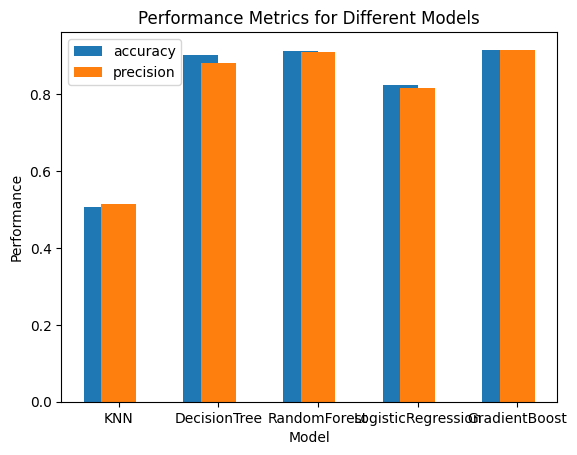

In [105]:
LogResults(df_in_g_result, 'In game Geral')